# Practicing Logistic Regression on sklearn digits dataset 

In [32]:
#importing the necassary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
#loading the digits
digits = load_digits()

#viewing the data shapes
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


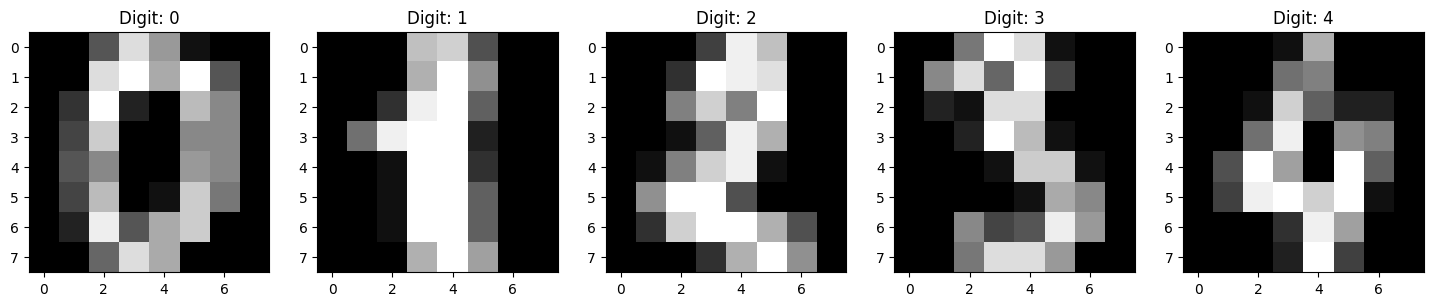

In [42]:
#Visualization
plt.figure(figsize=(18, 5))

for index, (image, digit) in enumerate(zip(digits.data[: 5], digits.target[: 5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.grey)
    plt.title("Digit: {}".format(digit))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
y_pred = model.predict(X_test)

In [38]:
model.score(X_test, y_test)

0.9644444444444444

In [39]:
#viewing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 47,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 40,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  1],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 44]])

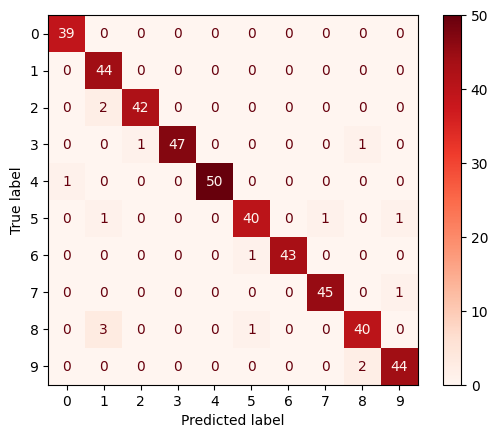

In [40]:
#visualizing the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot(cmap=plt.cm.Reds)


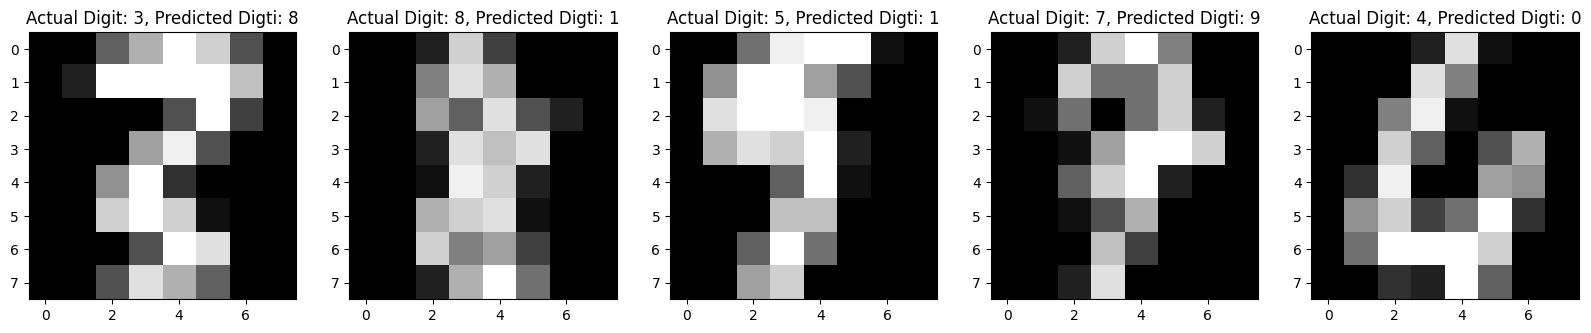

In [45]:
#seeing the errors the model made
errors = []
for image, actual_digit, pred_digit  in zip(X_test, y_test, y_pred):
    if actual_digit != pred_digit:
        errors.append((image, actual_digit, pred_digit))
        if len(errors) >= 5:
            break

plt.figure(figsize=(20, 4))
for index, (image, actual_digit, pred_digit) in enumerate(errors):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.grey)
    plt.title("Actual Digit: {}, Predicted Digti: {}".format(actual_digit, pred_digit))